In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Dataset1.csv')

# Step 1: Data Inspection
print("Initial Data:")
print(df.head())
print("\nData Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())





Initial Data:
   Student ID First Name Last Name  Marks                 Email ID  \
0           1       John       Doe   85.0     john.doe@example.com   
1           2       Jane     Smith   92.0   jane.smith@example.com   
2           3      Alice   Johnson   40.0    alice.johnson@xyz.com   
3           4        Bob     Brown  110.0                      NaN   
4           5      Carol     Davis   78.0  carol.davis@example.com   

   Attendance (%) Status   Age           Subject          City  
0            92.0   Pass  24.0           History       Houston  
1            88.0   Pass  21.0              Math      New York  
2            70.0   Fail  22.0  Computer Science  Philadelphia  
3            95.0   Pass  24.0  Computer Science      New York  
4            63.0   Pass  20.0           Science   Los Angeles  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------  

In [2]:

# Step 2: Handle Missing Values
# Impute missing numerical values with the mean
df['Marks'] = df['Marks'].fillna(int(df['Marks'].mean()))
df['Attendance (%)'] = df['Attendance (%)'].fillna(int(df['Attendance (%)'].mean()))
df['Age']=df['Age'].fillna(int(df['Age'].mean()))

In [3]:
# Fill missing categorical values with a placeholder
df['First Name'] = df['First Name'].fillna('Unknown')
df['Last Name'] = df['Last Name'].fillna('Unknown')
df['Status'] = df['Status'].fillna('Unknown')
df['Subject']= df['Subject'].fillna('Unknown')
df['Email ID']=df['Email ID'].fillna('Unknown')
df['City']= df['City'].fillna('Unknown')

In [4]:
# Check for remaining missing values
print("\nMissing Values after Imputation:")
print(df.isnull().sum())


Missing Values after Imputation:
Student ID        0
First Name        0
Last Name         0
Marks             0
Email ID          0
Attendance (%)    0
Status            0
Age               0
Subject           0
City              0
dtype: int64


In [5]:
# Check for duplicates
print("\nNumber of Duplicates:")
print(df.duplicated().sum())



Number of Duplicates:
0


In [6]:
# Step 3: Handle Duplicates
df = df.drop_duplicates()

In [7]:
# Check for remaining duplicates
print("\nNumber of Duplicates after Removal:")
print(df.duplicated().sum())


Number of Duplicates after Removal:
0


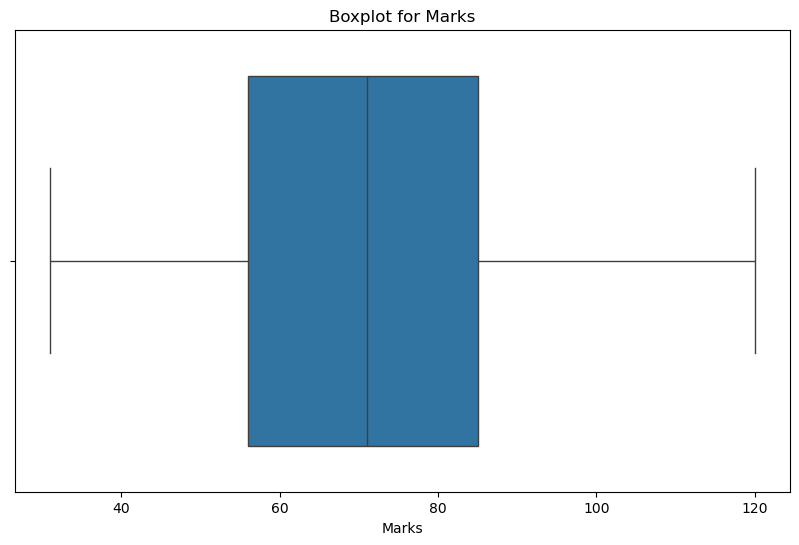

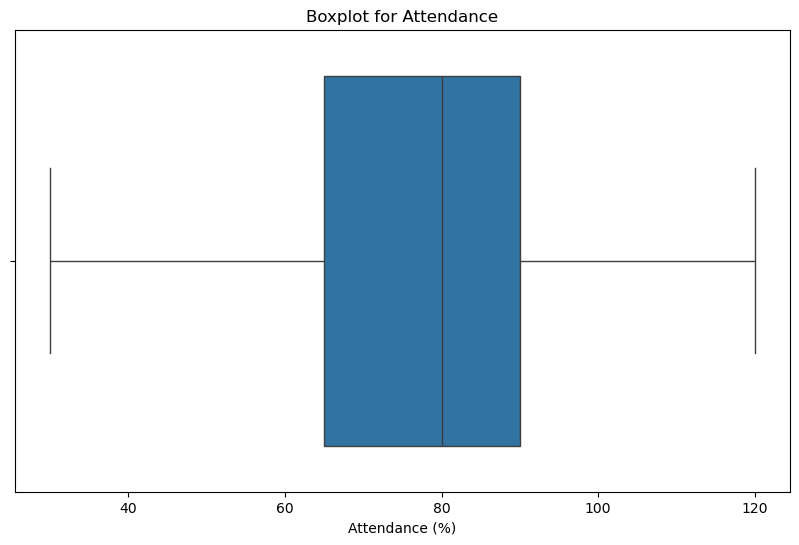

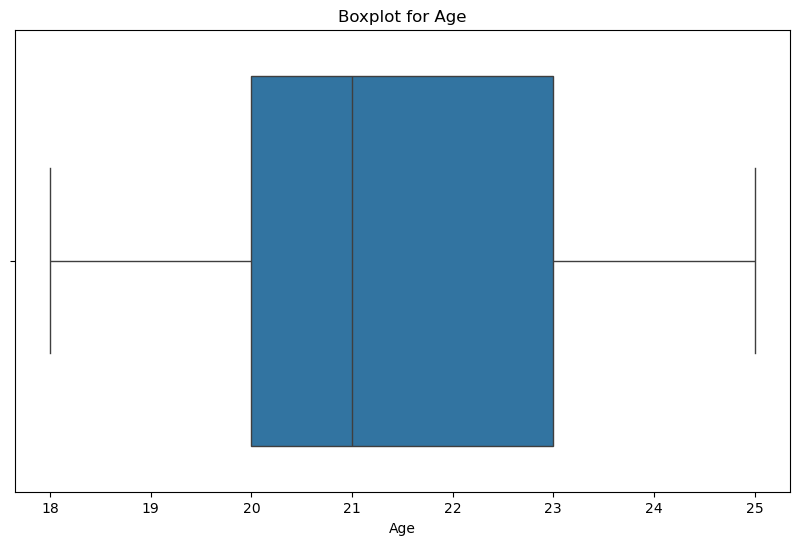

In [8]:
# Step 4: Detect and Treat Outliers
# Boxplot for Marks to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Marks'])
plt.title('Boxplot for Marks')
plt.show()

# Calculate IQR for Marks to remove outliers
Q1_marks = df['Marks'].quantile(0.25)
Q3_marks = df['Marks'].quantile(0.75)
IQR_marks = Q3_marks - Q1_marks
lower_bound_marks = Q1_marks - 1.5 * IQR_marks
upper_bound_marks = Q3_marks + 1.5 * IQR_marks

# Remove outliers in 'Marks'
df = df[(df['Marks'] >= lower_bound_marks) & (df['Marks'] <= upper_bound_marks)]

# Boxplot for Attendance to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Attendance (%)'])
plt.title('Boxplot for Attendance')
plt.show()
# Calculate IQR for Attendance to remove outliers
Q1_attendance = df['Attendance (%)'].quantile(0.25)
Q3_attendance = df['Attendance (%)'].quantile(0.75)
IQR_attendance = Q3_attendance - Q1_attendance
lower_bound_attendance = Q1_attendance - 1.5 * IQR_attendance
upper_bound_attendance = Q3_attendance + 1.5 * IQR_attendance

# Remove outliers in 'Attendance (%)'
df = df[(df['Attendance (%)'] >= lower_bound_attendance) & (df['Attendance (%)'] <= upper_bound_attendance)]

# Boxplot for Age to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot for Age')
plt.show()

# Calculate IQR for Age to remove outliers
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Remove outliers in 'Age'
df = df[(df['Age'] >= lower_bound_age) & (df['Age'] <= upper_bound_age)]


In [9]:
# Step 5: Standardize Categorical Columns (e.g., fix typos or formatting inconsistencies)
# Standardize 'Status' column to have consistent format
df['Status'] = df['Status'].str.strip().str.capitalize()

# Check if there are any unexpected values in 'Status'
print("\nUnique values in 'Status' column after standardization:")
print(df['Status'].unique())

#Checking the format for email-id
email_pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'

# Check validity of emails
df['Valid Email'] = df['Email ID'].str.match(email_pattern)
df['Valid Email']=df['Valid Email'].fillna('FALSE')

# Final Cleaned Data Inspection
print("\nCleaned Data (First 5 rows):")
print(df.head())


# Save the cleaned data to a new CSV file
df.to_csv('cleaned_data.csv', index=False)


Unique values in 'Status' column after standardization:
['Pass' 'Fail' 'Unknown']

Cleaned Data (First 5 rows):
   Student ID First Name Last Name  Marks                 Email ID  \
0           1       John       Doe   85.0     john.doe@example.com   
1           2       Jane     Smith   92.0   jane.smith@example.com   
2           3      Alice   Johnson   40.0    alice.johnson@xyz.com   
3           4        Bob     Brown  110.0                  Unknown   
4           5      Carol     Davis   78.0  carol.davis@example.com   

   Attendance (%) Status   Age           Subject          City  Valid Email  
0            92.0   Pass  24.0           History       Houston         True  
1            88.0   Pass  21.0              Math      New York         True  
2            70.0   Fail  22.0  Computer Science  Philadelphia         True  
3            95.0   Pass  24.0  Computer Science      New York        False  
4            63.0   Pass  20.0           Science   Los Angeles         True 